# **Conquering Imbalance: A Machine Learning Odyssey for Fraud Detection**

**Project Description:**

In an effort to improve financial security and stop fraud, we set out on a difficult quest to create a reliable machine learning model for fraud transaction recognition using an unbalanced dataset. This project is a brilliant example of our unwavering dedication to using data and cutting-edge technologies to protect financial institutions against fraudulent actions.

**Dataset Selection:**

Our adventure started with the careful selection of a dataset from Kaggle([Dataset link:](https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data)), a recognized platform for data scientists and machine learning aficionados. This dataset illustrates the intricacy of financial institutions and transactions in real life. Just 8,213 rows—a startling 6,362,620 rows—contain data pertinent to fraudulent transactions. This dataset presented a substantial challenge because fraudulent transactions accounted for only 0.12% of the sample.

**Features of Dataset**

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


**Challenges and Objectives:**

The asymmetry of the dataset presented one of the main obstacles. Unbalanced datasets that favor the majority class commonly fool machine learning models, which results in insufficient fraud detection. Our primary objectives were to address this imbalance and create a model capable of accurately identifying fraudulent transactions within the system.

**Key Highlights:**

1. **Data Preprocessing**: To address the imbalance in the data, we began a comprehensive data preparation journey that involved resampling techniques such as undersampling the majority class and oversampling the minority class. To level the playing field for our model, this step was crucial.

2. **Feature Engineering**: We delved into the intricacies of financial transactions, meticulously crafting components that would provide our model with a comprehensive understanding of transaction behaviors and patterns.

3. **Machine Learning Models**: Our work involved the examination and evaluation of multiple machine learning models. We looked at a number of models, including Random Forest, Gradient Boosting, XGBoost, LightGBM, and Logistic Regression, each of which had a unique advantage for the job at hand.

4. **Hyperparameter Tuning**: We realized that fine-tuning model parameters was necessary to maximize performance. We tried to maximize the model's ability to accurately detect fraudulent transactions by carefully modifying the hyperparameters.

5. **Evaluation Metrics**: A comprehensive analysis was conducted, concentrating on F1-score, recall, and accuracy. With the help of these metrics, we were able to evaluate how well the model identified fraudulent transactions while reducing false positives.

**Project Impact:**

Our endeavor intends to significantly boost financial security by optimizing machine learning models and managing the complexity of an imbalanced dataset. We believe the plan will protect the financial interests of all parties participating in the process by enhancing the system's capacity to identify and prevent fraudulent transactions.

**Conclusion:**

Our project is proof of our commitment to using machine learning and data science to solve significant real-world issues. By leveraging state-of-the-art technology, data preparation, and comprehensive model evaluation, we hope to make a significant contribution to the ongoing battle against financial fraud and provide a more reliable and trustworthy financial system for everybody.

Our work is a step toward creating a financial ecosystem that benefits people, businesses, and financial institutions equally and is more secure and resilient.

### **Connecting Google Drive to Google Colab**

The below code helps us to connect Google Drive and Google Collab. The project uses Google Drive as it is cloud-based, making the data available to anyone anytime as long as he has a good internet connection.

In [2]:
# To connect my Google Drive to Collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Important libraries**

The below code consists of the libraries that were needed to make the ML model that would predict fraud Transactions. The below code contains libraries that were used for data processing, manipulation, making ML models, tunning the ML models, and creating visualizations that would help to understand the dataset better.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import xgboost as xgb
import time

### Importing and Analyzing Fraudulent Financial Transaction Data

The below code helps me to import my data from Google Drive into Google Collab to perform the necessary functions/ steps. `/content/drive/MyDrive/Fraud_Financial_Transactions/Fraud.csv` is the location of the dataset in the Google Drive and `shape` function tells the shape of the dataset the no. of rows and columns it has.

In [4]:
file_path = '/content/drive/MyDrive/Fraud_Financial_Transactions/Fraud.csv'
df = pd.read_csv(file_path)
df.shape

(6362620, 11)

## **Data Processing**
Below are the code of the data processing that was done in order to make the data more suitable for our ML model by removing any errors or unwanted data from the dataset, thereby increasing the efficiency of our model.

### **Understanding Dataset Information**

`df.info` tells what are the no. of rows and columns the dataset has, the data type of each column of the dataset, and the size of the dataset. it helps to understand the dataset better check which columns we nedd and what columns should be removed or worked on to make the predictor model even better.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### **Exploring the First and Last 10 Rows of the Dataset**

In this code cell, we are using the `df.head(10)` and `df.tail(10)` method to display the first 10 rows of a DataFrame named `df` and get an initial understanding of wgat the dataset looks like the values inside it and what data proccessing methods will be required to enhance the quality of dataset.

In [6]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [7]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### **Data Preprocessing for Improved Fraud Detection**

The code is used to remove the columns that were deemed unnecessary or would affect the performance of the prediction model.

The removal of these columns is necessary as they might lead to bad trans and analysis making our model less efficient in detecting the real trends and analysis we need to make our model ready for the real world.


In [8]:
columns_to_remove = ['step', 'nameOrig', 'nameDest']
df = df.drop(columns=columns_to_remove)
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


### **Understanding the Distribution of Fraudulent Transactions**

The code below illustrates how unbalanced the data is; as you can see, there is so little fraud data that the plot of the data is not even visible.


0    6354407
1       8213
Name: isFraud, dtype: int64


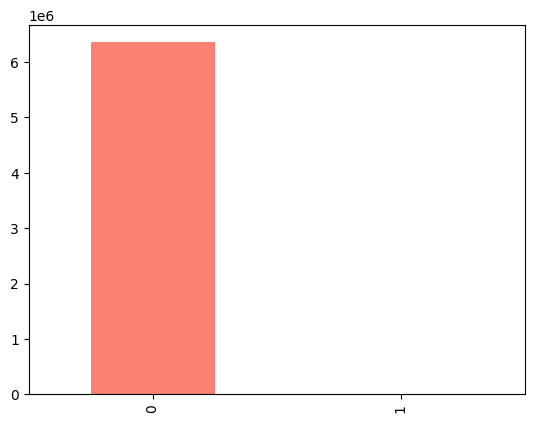

In [9]:
# Let's find out how many of each class there
print(df["isFraud"].value_counts())
df["isFraud"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

### **Understanding Missing Data in a Pandas DataFrame**

The data processing procedure makes use of the code. It indicates which row has the most missing values and whether the dataset has any missing data at all. Thankfully, none of the columns in our data have any missing values, which makes data processing even simpler. Since missing values reduce the ML models' efficiency, we would have to exclude them.

In [10]:
df.isna().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### **Balancing the Scales: Ensuring Data Equality in Fraud Detection**

We attempted to balance the count of fraud and non-fraud data in this code because if the data had been unbalanced and the count of fraud had been extremely low, we would not have been able to identify useful trends and patterns for the fraud data.

Since there were only 8213 rows containing fraud data, 8213 rows containing non-fraud data were chosen at random, and the 8213 rows containing fraud and non-fraud data were combined to create a new data frame named `balanced_df` using the `concat` function and then adjusted the data frame's index.



In [ ]:
# Select rows with isFraud=1 and 8213 random samples
fraud_1 = df[df['isFraud'] == 1].sample(n=8213, random_state=42)

# Select rows with isFraud=0 and 8213 random samples
fraud_0 = df[df['isFraud'] == 0].sample(n=8213, random_state=42)

# Concatenate the two DataFrames
balanced_df = pd.concat([fraud_1, fraud_0])

# Shuffle the rows in the new DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42)

# Reset the index of the new DataFrame
balanced_df.reset_index(drop=True, inplace=True)

balanced_df.shape

(16426, 8)

In [ ]:
balanced_df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_IN,76550.74,1096252.93,1172803.66,2208784.02,2132233.28,0,0
1,PAYMENT,12617.11,339181.87,326564.76,0.00,0.00,0,0
2,TRANSFER,22877.00,22877.00,0.00,0.00,0.00,1,0
3,TRANSFER,182739.36,182739.36,0.00,0.00,0.00,1,0
4,CASH_OUT,4738282.28,4738282.28,0.00,0.00,4738282.28,1,0
5,CASH_OUT,10000000.00,10000000.00,0.00,759509.55,10759509.55,1,0
6,TRANSFER,418896.64,291444.00,0.00,12388464.20,12807360.84,0,0
7,CASH_OUT,76582.23,76582.23,0.00,1869045.51,1945627.75,1,0
8,CASH_OUT,25091.68,1022.00,0.00,164200.70,189292.38,0,0
9,PAYMENT,16800.24,140537.00,123736.76,0.00,0.00,0,0


In [ ]:
balanced_df.tail(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
16416,CASH_IN,7835.15,10130.00,17965.15,2492921.08,2485085.93,0,0
16417,PAYMENT,2317.72,212.00,0.00,0.00,0.00,0,0
16418,PAYMENT,9181.76,0.00,0.00,0.00,0.00,0,0
16419,CASH_OUT,219110.27,219110.27,0.00,402986.55,622096.82,1,0
16420,TRANSFER,1653144.10,1653144.10,0.00,0.00,0.00,1,0
16421,CASH_OUT,542461.74,0.00,0.00,1757516.20,2299977.94,0,0
16422,CASH_IN,2032.93,7625673.00,7627705.93,323961.50,321928.56,0,0
16423,TRANSFER,768520.15,768520.15,0.00,0.00,0.00,1,0
16424,TRANSFER,379057.93,379057.93,0.00,0.00,0.00,1,0
16425,CASH_IN,98932.38,1609496.52,1708428.90,3484293.51,3385361.13,0,0


0    8213
1    8213
Name: isFraud, dtype: int64


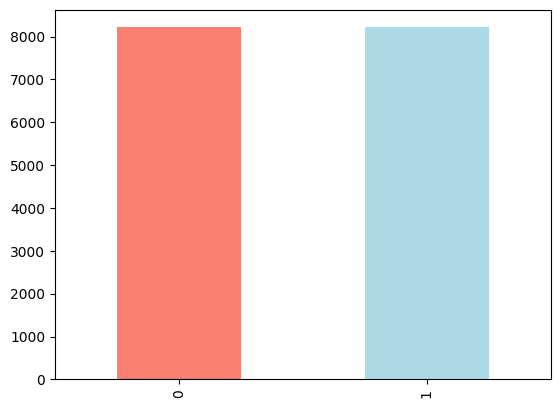

In [ ]:
print(balanced_df["isFraud"].value_counts())
balanced_df["isFraud"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

## **Data Vizualization**
Below here are the codes to make the neccesary plots and graphs to understand the dataset in a much better way and indentify which factors affect which and what are possible trends and ananlysis that we can hope to see from the dataset. It helps to find any irregular data or mistakes in the dataset.

### **Distribution of Transaction Types**
The code is used to plot the distribution of the payment type and which type of payment is more likely to lead to fraudulent transactions. In the graph, we have the count on the y-axis and the transaction type on the x-axis.

The graph tells us that the most used type of transaction is the cash-out type and the debit card is used the least by the people.


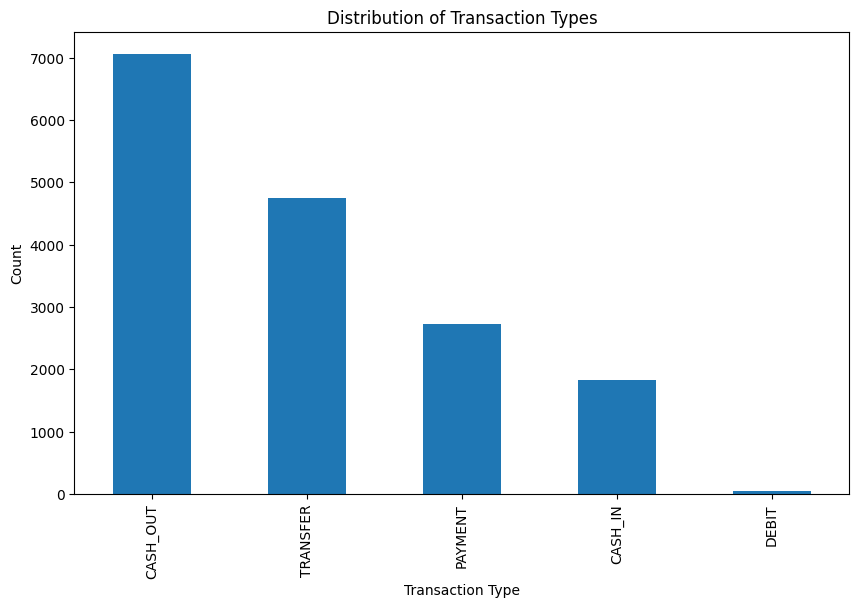

In [ ]:
plt.figure(figsize=(10, 6))
balanced_df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

### **Correlation matrix**
The code is used to build a correlation matrix that would help us understand the relation of each column with the other and what are the columns that affect the fraud transactions directly and need to be included in our analysis and which only.

Columns with values near 1 should be used and given more importance than the columns with values near 0 as the columns with values near 1 are more likely to affect our data than the columns with values near 0.


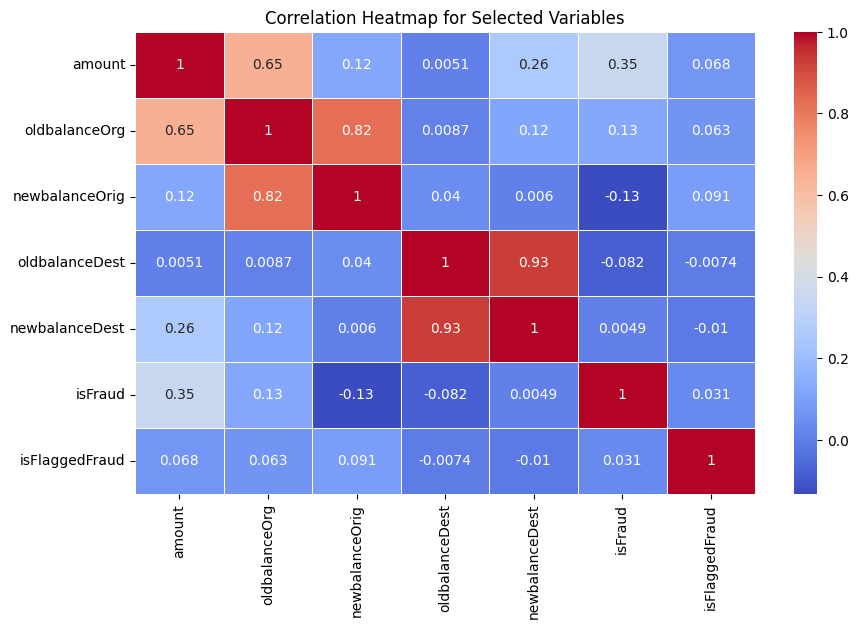

In [ ]:
plt.figure(figsize=(10, 6))
columns_to_plot = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
sns.heatmap(balanced_df[columns_to_plot].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()

### **Fraud Transactions Type**
The code is used to create a plot that tells which transaction type is majorly used for doing fraud transactions and from the plot we can tell that cash-out and transfer are the most likely to be used for fraud transactions and should be kept an eye out for it.

<Figure size 1000x600 with 0 Axes>

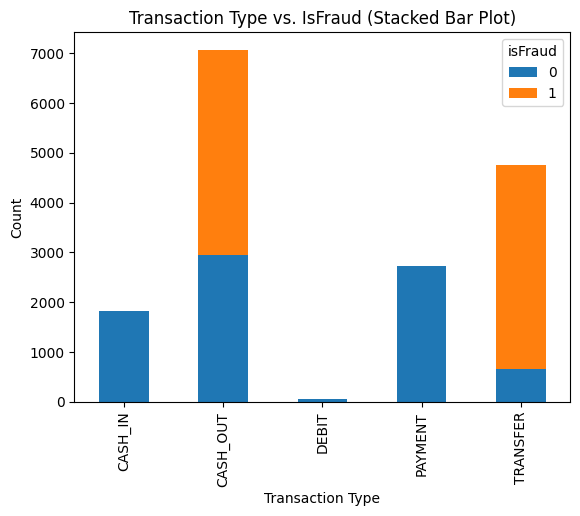

In [ ]:
plt.figure(figsize=(10, 6))
pd.crosstab(balanced_df['type'], balanced_df['isFraud']).plot(kind='bar', stacked=True)
plt.title('Transaction Type vs. IsFraud (Stacked Bar Plot)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

### **Datatype Conversion**
The function of the below code is to convert the `type` column in the data frame from a categorical column to a numerical column using the `LabelEncoder()` by giving a specific number to each transaction type in the type column. We do this because ML models work better with numbers rather than text.

In [ ]:
le = LabelEncoder()
balanced_df['type'] = le.fit_transform(balanced_df['type'])
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            16426 non-null  int64  
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   newbalanceDest  16426 non-null  float64
 6   isFraud         16426 non-null  int64  
 7   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.0 MB


## **Model Creation**
this section contains the code used to create the ML modle that will help us create the predictior model to predict the fraud transactions from all transactions.

### **Splitting the data**
Using this code we first tried to create 2 data frames one with all the columns inside the `balanced_df` but with the `isFraud` column and the other data frame with only the `isFraud` column.

Then we used the `train_test_split` function of the `sklearn` library to split the data into test dataset and train dataset. The train data set will be used to train the ML model and find the trends and patterns in our dataset and the test data set will be used to test the trained ML model. `test_size` parameters help us to decide the size of our test and train dataset in this project we set that value to 0.2 which means that 20% of the dataset will be used to text and other 80% will be used to train it.

In [ ]:
# Separate the target variable 'isFraud' and the features
X = balanced_df.drop(columns=['isFraud'])
y = balanced_df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Model Dictionary**
this code contains a dictionary that contains all the models we are thinking of using in the project. In the dictionary the model names are the keps and their corresponding functions are the values.

In [ ]:
# Create a dictionary of all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Isolation Forest": IsolationForest(contamination=0.01),
    "One-Class SVM": OneClassSVM(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    'LGBM': LGBMClassifier()
}

### **Models evaluation**
Here i create a for loop that will use the modle dictionary made above and run all the models present in it on the train dataset and check its accuracy with the test dataset and give us the model name and the accuracy it has.

In [ ]:
# Train and evaluate models
# Initialize an empty dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate models
for name, model in models.items():
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train)
    end_time = time.time()  # Record end time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy score in the dictionary (multiplied by 100)
    accuracy_scores[name] = accuracy * 100

    training_time = end_time - start_time
    print(f"{name} - Accuracy: {accuracy:.4f} - Training Time: {training_time:.4f} seconds")

Logistic Regression - Accuracy: 0.8238 - Training Time: 0.0465 seconds
Random Forest - Accuracy: 0.9921 - Training Time: 0.9159 seconds
Gradient Boosting - Accuracy: 0.9884 - Training Time: 1.5674 seconds
XGBoost - Accuracy: 0.9945 - Training Time: 0.1297 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest - Accuracy: 0.5006 - Training Time: 0.3286 seconds
One-Class SVM - Accuracy: 0.2788 - Training Time: 6.2869 seconds
K-Nearest Neighbors - Accuracy: 0.9501 - Training Time: 0.0108 seconds
[LightGBM] [Info] Number of positive: 6549, number of negative: 6591
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 13140, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498402 -> initscore=-0.006393
[LightGBM] [Info] Start training from score -0.006393
LGBM - Accuracy: 0.9954 - Training Time: 0.1751 seconds


### **Model Evaluation Plot**
The below plot tells us the performance of diffrent models on the dataset from the plt we cna see that `Random Forest - Accuracy: 0.9921`,
`Gradient Boosting - Accuracy: 0.9884`, `XGBoost - Accuracy: 0.9945`, `LGBM - Accuracy: 0.9954` have performed really well as compared to others and have taken very less time to create the model other than the Gradient boosting.

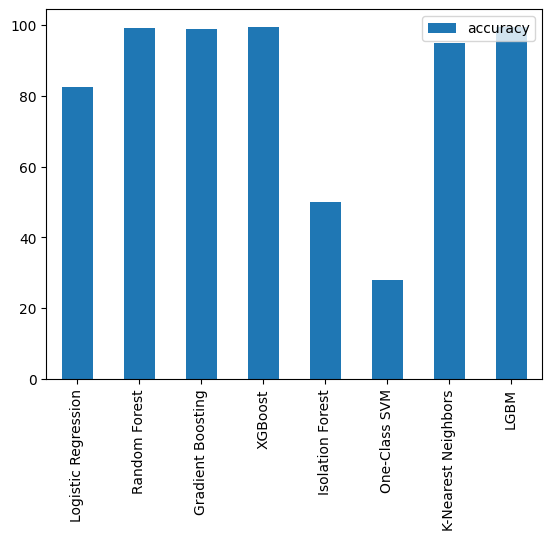

In [ ]:
model_compare = pd.DataFrame(accuracy_scores, index=["accuracy"])
model_compare.T.plot.bar();

## **Tunning the Models**
in this section we do hyperparameter tunning on the ML models we like before and find the best combination of parameters that would help us to increase the accuracy of the model.

### **Tunning the Random Forest Model**
here we tried to hyperparameter tune the Random Forest model to find the parameter that would give us the best result for our model so I created a dictionary of parameter and added range of values then we used the `GridSearchCV` to find combination of parameters that would give much better accuracy than the random forest model that was created before.

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be a leaf node
}

# Create a Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the Grid Search to your data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (Random Forest model with best hyperparameters)
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test data
accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 1.0


### **Tunning the XGBoost Model**
here we tried to hyperparameter tune the XGBoost model to find the parameter that would give us the best result for our model so I created a dictionary of parameter and added range of values then we used the `GridSearchCV` to find combination of parameters that would give much better accuracy than the XGBoost model that was created before.

In [ ]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of the tree
    'min_child_weight': [1, 2, 3]  # Minimum sum of instance weight (hessian) needed in a child
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test data
best_model_xgb = grid_search.best_estimator_
accuracy = best_model_xgb.score(X_test, y_test)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}
Test Accuracy with Best Hyperparameters: 0.994826536822885


### **Tunning the LGBM Model**
here we tried to hyperparameter tune the LGBM model to find the parameter that would give us the best result for our model so I created a dictionary of parameter and added range of values then we used the `GridSearchCV` to find combination of parameters that would give much better accuracy than the LGBM model that was created before.

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [31, 50, 100],   # Number of leaves in each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking to prevent overfitting
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
}

# Create the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
best_model_lgbm = grid_search.best_params_
print("Best Hyperparameters:", best_model_lgbm)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 8213, number of negative: 8213
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 16426, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}
Best Accuracy: 0.9954340901434571


### **Datatype Conversion**
The function of the below code is to convert the `type` column in the data frame from a categorical column to a numerical column using the `LabelEncoder()` by giving a specific number to each transaction type in the type column. We do this because ML models work better with numbers rather than text.

In [ ]:
# Assuming your DataFrame is called 'df'
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            16426 non-null  int64  
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   newbalanceDest  16426 non-null  float64
 6   isFraud         16426 non-null  int64  
 7   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.0 MB


### **Final result**
ih the below section we used the parameters we found in the hyperparameter tunning and used it on the whole dataset, till now we were using the model on the subset of the orignal dataset where values of the no of rows of fraud and non- fraud dataset was same but now we will use it on the whole dataset which is imbalanced and where only 0.12% of the data is only about Fraud data and we see the models have worked perfectly on the whole datasrt and the accuracy of the data is very good wil lall of them around 99%.

In [ ]:
X_total = df.drop(columns=['isFraud'])
y_total = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

# Define the best hyperparameters for each model
best_params = {
    'Random Forest': {
        'max_depth': None,
        'min_samples_leaf': 1,
        'min_samples_split': 5,
        'n_estimators': 200
    },
    'XGBoost': {
        'learning_rate': 0.2,
        'max_depth': 5,
        'min_child_weight': 1,
        'n_estimators': 300
    },
    'LightGBM': {
        'learning_rate': 0.1,
        'n_estimators': 100,
        'num_leaves': 50
    }
}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

# Initialize variables to store training times and accuracies
training_times = {}
accuracies = {}

for model_name, model in models.items():
    # Initialize and configure the model with the best hyperparameters
    model.set_params(**best_params[model_name])

    # Train and measure the time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    training_times[model_name] = training_time
    accuracies[model_name] = accuracy

# Display the results
for model_name in models.keys():
    print(f"{model_name} Model:")
    print("Training Time:", training_times[model_name], "seconds")
    print("Accuracy:", accuracies[model_name])
    print()

[LightGBM] [Info] Number of positive: 6593, number of negative: 5083503
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.413614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001295 -> initscore=-6.647747
[LightGBM] [Info] Start training from score -6.647747
Random Forest Model:
Training Time: 1994.0005700588226 seconds
Accuracy: 0.9996958799991199

XGBoost Model:
Training Time: 65.4957070350647 seconds
Accuracy: 0.999669161446071

LightGBM Model:
Training Time: 33.09651231765747 seconds
Accuracy: 0.9982389330181591



## **Conclusion**
From the project we know that sometime the dataset you use are not a good one to work with and has to be tranformed and rearranged to make the dataset useable for your model.